In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from numpy import log
from statsmodels.tsa.stattools import acf
from pandas.plotting import autocorrelation_plot

In [349]:
df_suhu = pd.read_csv(r"data_suhu_dunia.csv", header = 0)
df_fossil = pd.read_csv("fossil.csv", parse_dates = True)

In [350]:
print(df_suhu)
print(df_fossil)

            date  avg_temp  avg_temp_uncertainty      Country
0       1/1/2000     2.404                 0.496  Afghanistan
1       2/1/2000     3.155                 0.529  Afghanistan
2       3/1/2000     8.971                 0.333  Afghanistan
3       4/1/2000    18.440                 0.522  Afghanistan
4       5/1/2000    24.140                 0.435  Afghanistan
5       6/1/2000    25.451                 0.487  Afghanistan
6       7/1/2000    27.260                 0.507  Afghanistan
7       8/1/2000    26.416                 0.377  Afghanistan
8       9/1/2000    22.118                 0.695  Afghanistan
9      10/1/2000    15.272                 0.440  Afghanistan
10     11/1/2000     7.952                 0.638  Afghanistan
11     12/1/2000     4.395                 0.549  Afghanistan
12      1/1/2001     0.410                 0.547  Afghanistan
13      2/1/2001     4.211                 0.434  Afghanistan
14      3/1/2001    10.507                 0.374  Afghanistan
15      

In [289]:
suhu_avg = df_suhu.avg_temp.groupby(df_suhu.Country).mean()
df_suhu['date'] = pd.to_datetime(df_suhu['date'], errors='coerce')
suhu_avg_year = df_suhu.avg_temp.groupby(df_suhu.date.dt.year).mean()

In [290]:
#plt.rcParams['figure.figsize'] = [10, 5]
print(suhu_avg)
print(suhu_avg_year)

Country
Afghanistan                          15.402963
Africa                               24.930043
Albania                              13.630128
Algeria                              24.291585
American Samoa                       27.254415
Andorra                              12.291945
Angola                               22.478951
Anguilla                             27.507744
Antarctica                                 NaN
Antigua And Barbuda                  27.338091
Argentina                            15.243159
Armenia                               9.990848
Aruba                                28.668829
Asia                                  8.636372
Australia                            22.235604
Austria                               7.490640
Azerbaijan                           12.729116
Bahamas                              25.814897
Bahrain                              27.319957
Baker Island                         26.096829
Bangladesh                           25.497159
Barba

Text(0.5, 1.0, 'Average Temperature in The World\nFrom 2000 - 2013')

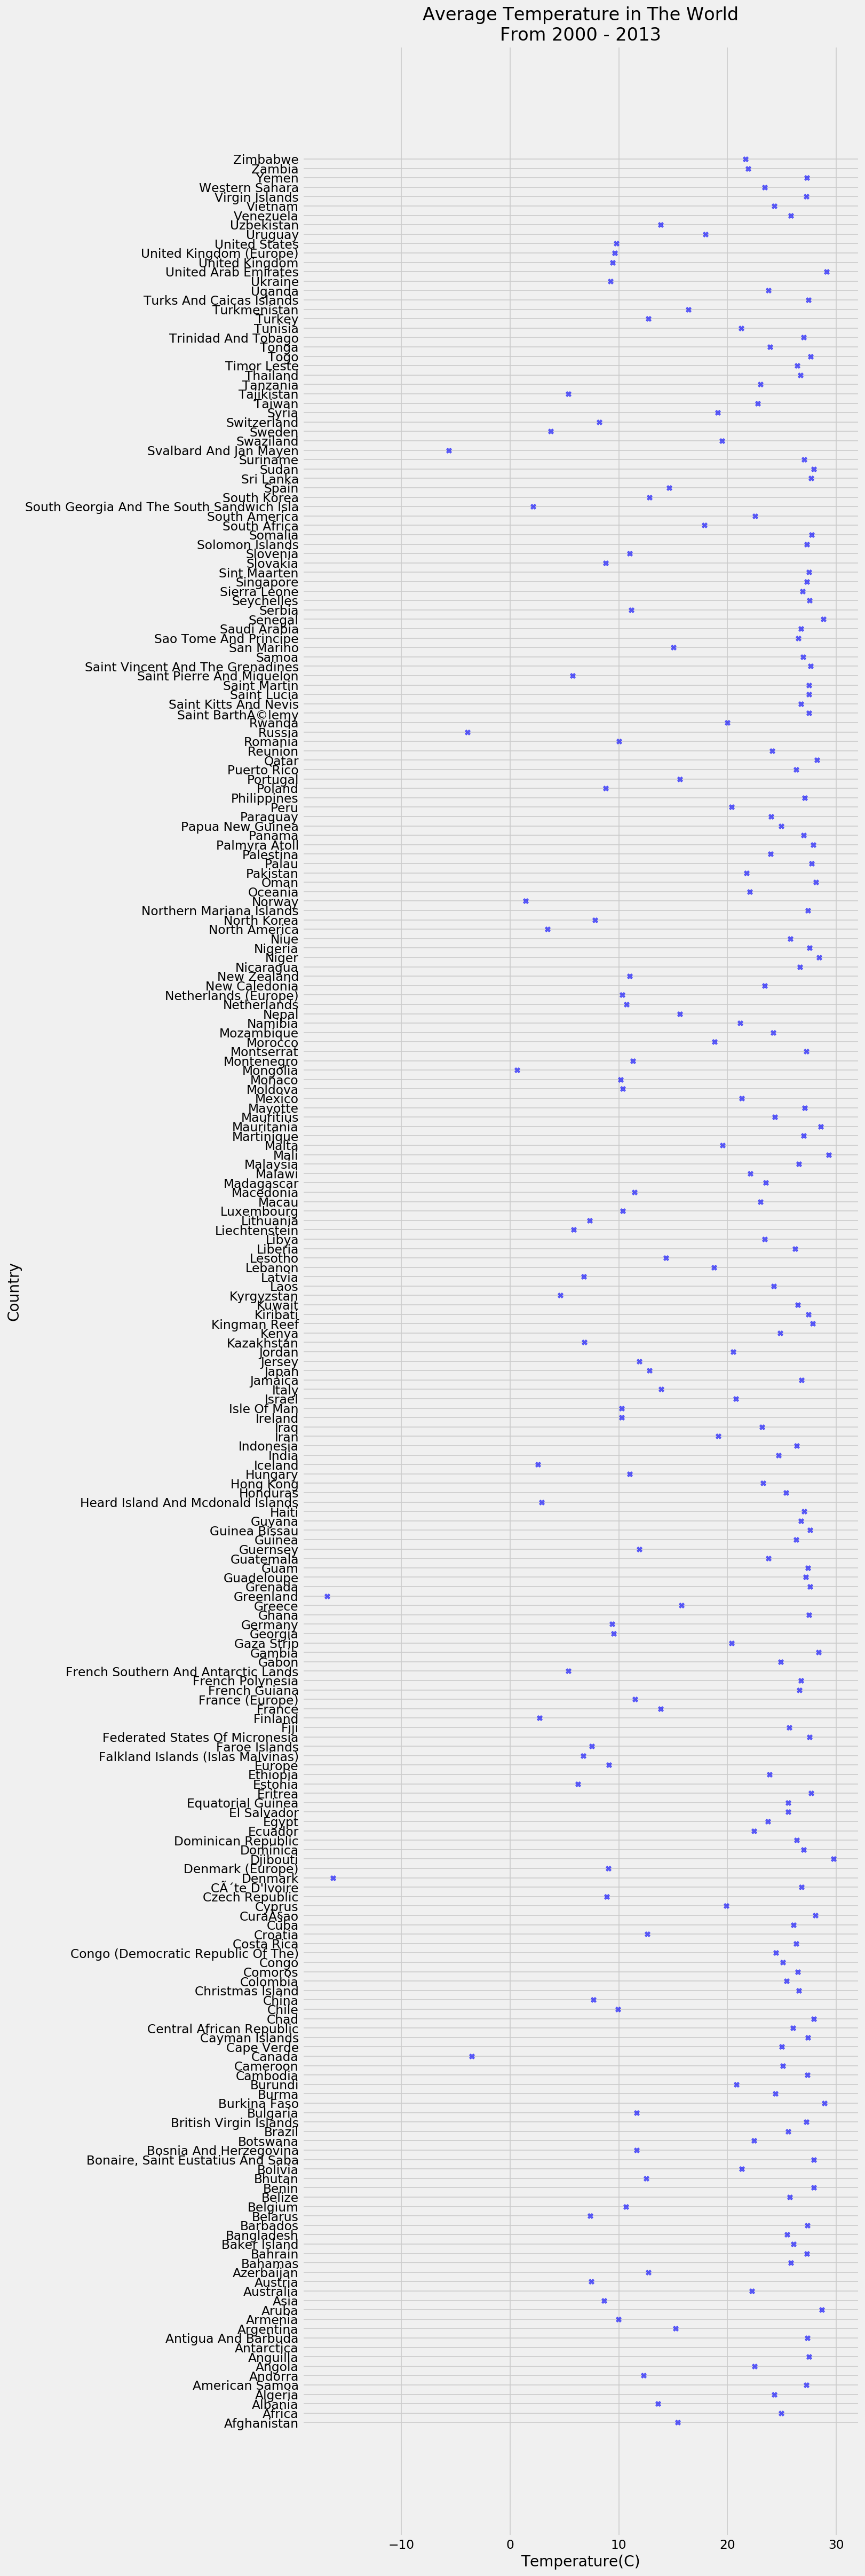

In [422]:
plt.rcParams['figure.figsize'] = [10, 48]
plt.scatter(suhu_avg, suhu_avg.index, color = 'blue', marker = 'X', alpha = 0.6)
plt.xlabel('Temperature(C)')
plt.ylabel('Country')
plt.title('Average Temperature in The World\nFrom 2000 - 2013')

Text(0.5, 0, 'Temperature(C)')

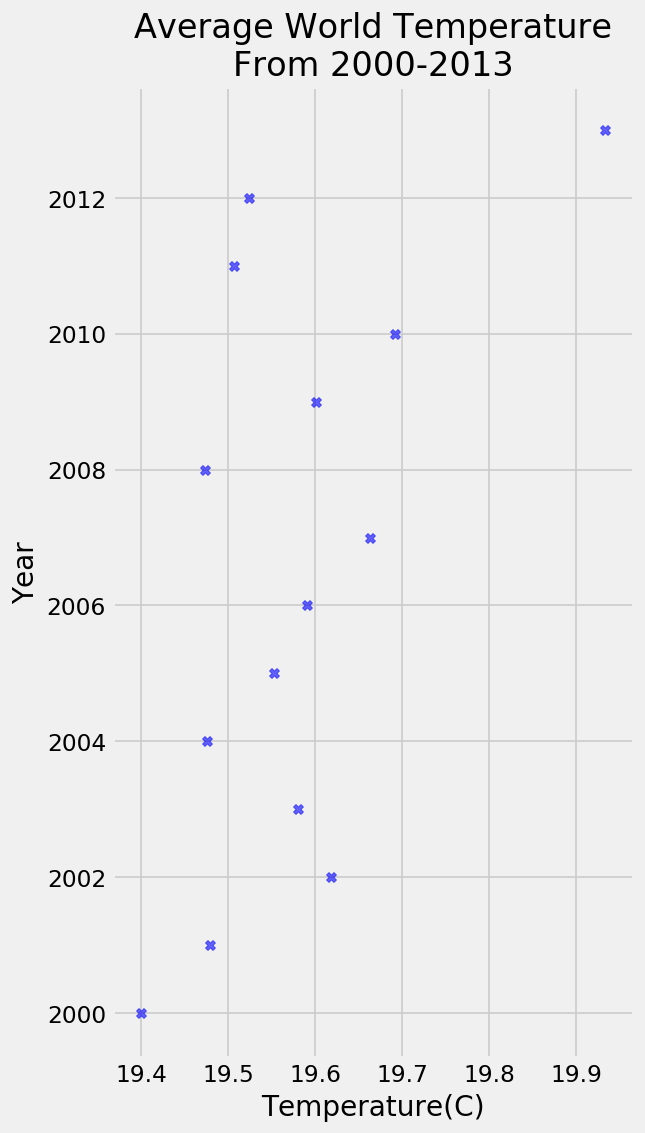

In [417]:
plt.rcParams['figure.figsize'] = [5, 10]
plt.scatter(suhu_avg_year, suhu_avg_year.index, color = 'blue', marker = 'X', alpha = 0.6)
plt.title('Average World Temperature\nFrom 2000-2013')
plt.ylabel('Year')
plt.xlabel('Temperature(C)')

In [295]:
coal_avg = df_fossil.Coal.groupby(df_fossil.Country).mean()
country = df_fossil.Country.drop_duplicates()

In [296]:
print(coal_avg)
print(country)

Country
Afghanistan                         2.302431
Albania                             0.114882
Algeria                                  NaN
Angola                                   NaN
Argentina                           0.657655
Aruba                                    NaN
Australia                        2306.642933
Austria                             2.728498
Azerbaijan                               NaN
Bahrain                                  NaN
Bangladesh                          4.045294
Barbados                                 NaN
Belarus                                  NaN
Belgium                             1.602607
Belize                                   NaN
Benin                                    NaN
Bhutan                              0.554731
Bolivia                                  NaN
Bosnia and Herzegovina             43.784675
Botswana                            5.902950
Brazil                             18.642051
Brunei                                   NaN
Bu

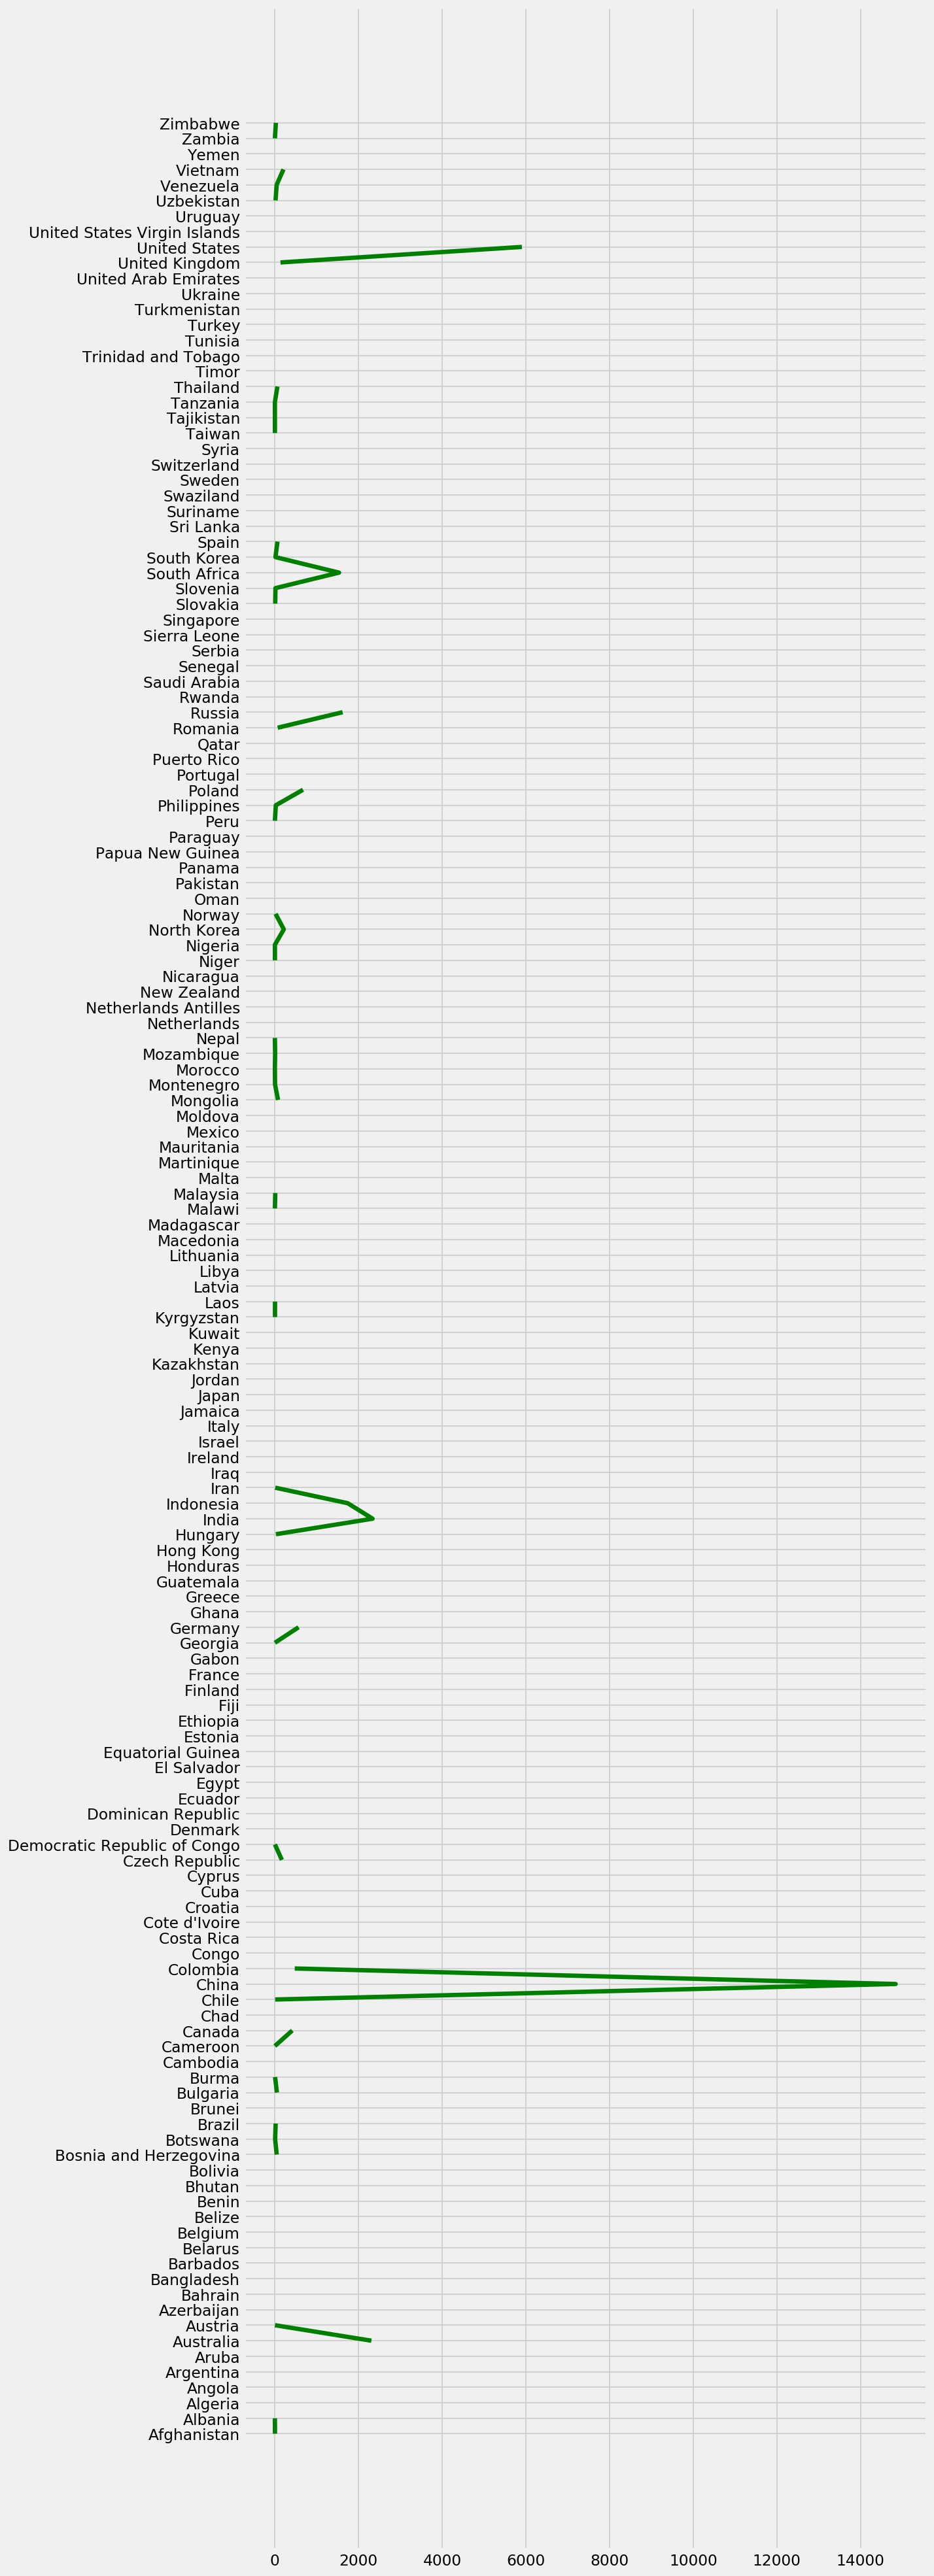

In [419]:
plt.rcParams['figure.figsize'] = [10, 40]
plt.plot(coal_avg, coal_avg.index, color = 'Green')

In [300]:
year = [2000]
for i in range (1, 15):
    year.append(i+2000)



Text(0.5, 1.0, 'Top 10 Country Coal Production\n2000-2014')

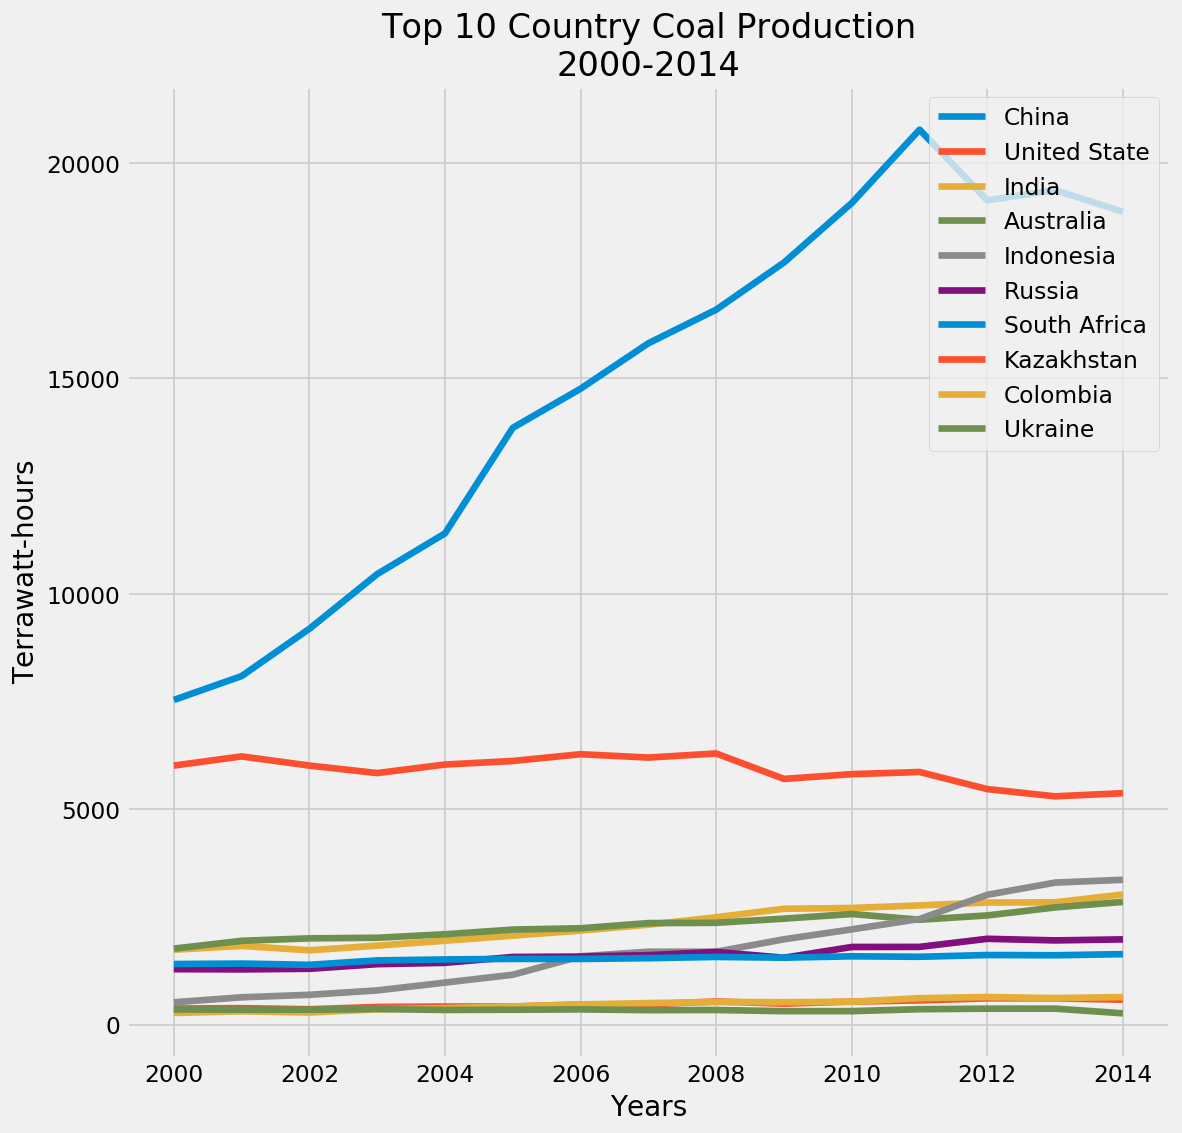

In [418]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.plot(year, df_fossil.loc[df_fossil.Country == 'China'].Coal, label = 'China')
plt.plot(year, df_fossil.loc[df_fossil.Country == 'United States'].Coal, label = 'United State')
plt.plot(year, df_fossil.loc[df_fossil.Country == 'India'].Coal, label = 'India')
plt.plot(year, df_fossil.loc[df_fossil.Country == 'Australia'].Coal, label = 'Australia')
plt.plot(year, df_fossil.loc[df_fossil.Country == 'Indonesia'].Coal, label = 'Indonesia')
plt.plot(year, df_fossil.loc[df_fossil.Country == 'Russia'].Coal, label = 'Russia')
plt.plot(year, df_fossil.loc[df_fossil.Country == 'South Africa'].Coal, label = 'South Africa')
plt.plot(year, df_fossil.loc[df_fossil.Country == 'Kazakhstan'].Coal, label = 'Kazakhstan')
plt.plot(year, df_fossil.loc[df_fossil.Country == 'Colombia'].Coal, label = 'Colombia')
plt.plot(year, df_fossil.loc[df_fossil.Country == 'Ukraine'].Coal, label = 'Ukraine')
plt.ylabel('Terrawatt-hours')
plt.xlabel('Years')
plt.legend(loc = 'upper right')
plt.title('Top 10 Country Coal Production\n2000-2014')


#1 Terrawatt-hours = 122835 tons of coal

In [357]:
suhu_dunia = pd.read_csv(r'suhu_dunia.csv', names = ['avg_temp'], header = 0)

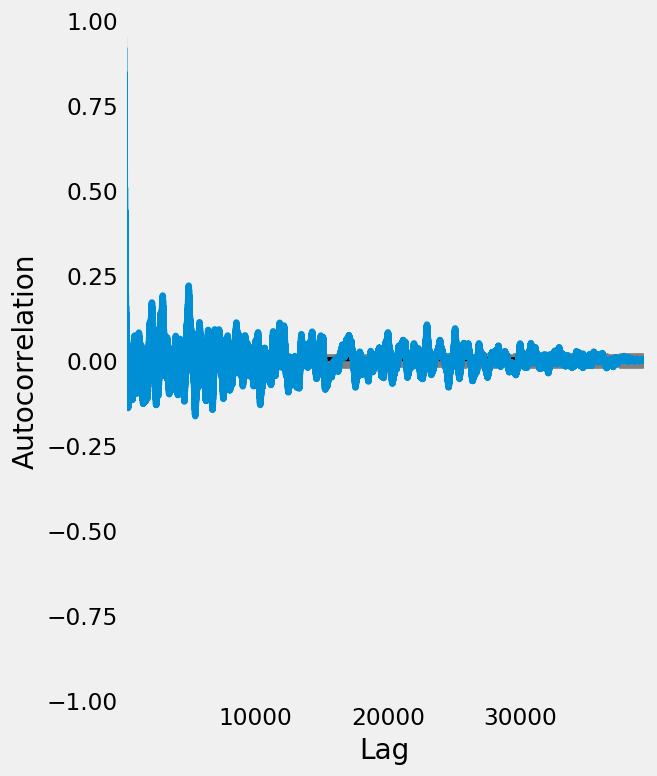

In [427]:
plt.rcParams['figure.figsize'] = [5, 7]
autocorrelation_plot(suhu_dunia)

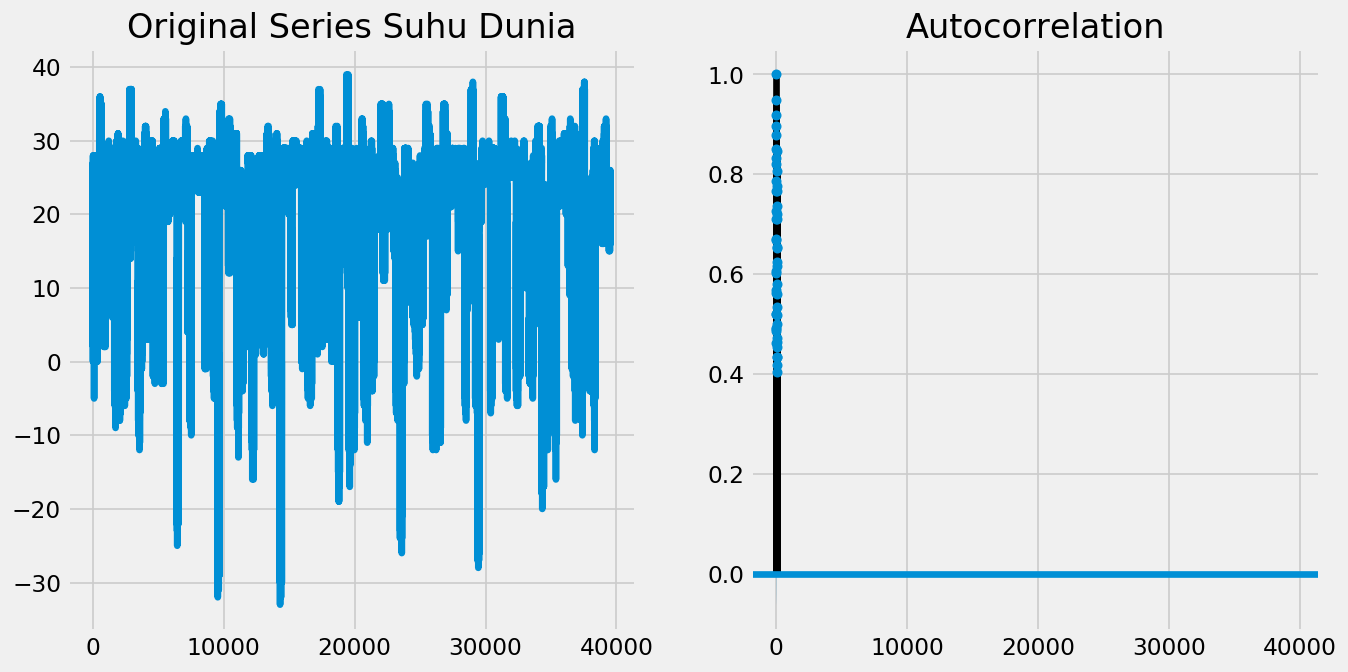

In [365]:
#original series
plt.rcParams.update({'figure.figsize':(12,6), 'figure.dpi':120})
fig, axes = plt.subplots(1,2, sharex = True)
axes[0].plot(suhu_dunia.avg_temp);
axes[0].set_title('Original Series Suhu Dunia')
plot_acf(suhu_dunia.avg_temp, ax = axes[1])
plt.show()

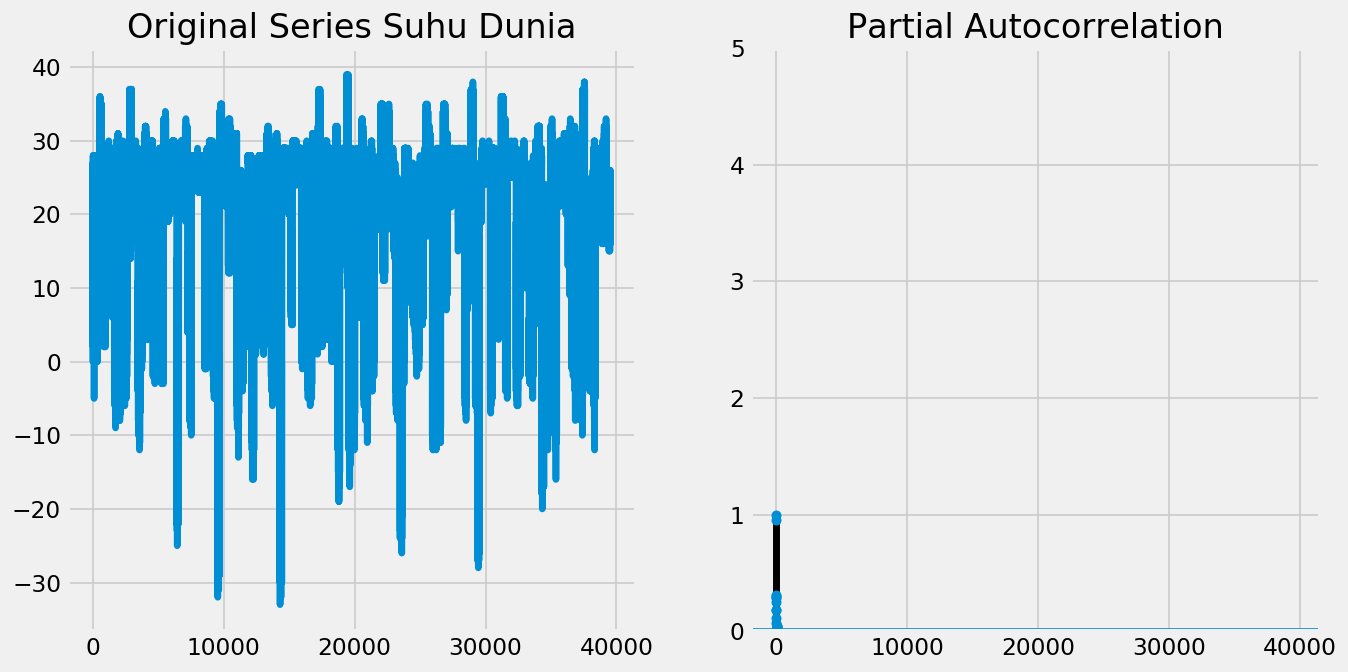

In [366]:
plt.rcParams.update({'figure.figsize':(12,6), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(suhu_dunia.avg_temp);
axes[0].set_title('Original Series Suhu Dunia')
axes[1].set(ylim=(0,5))
plot_pacf(suhu_dunia.avg_temp.dropna(), ax=axes[1])
plt.show()

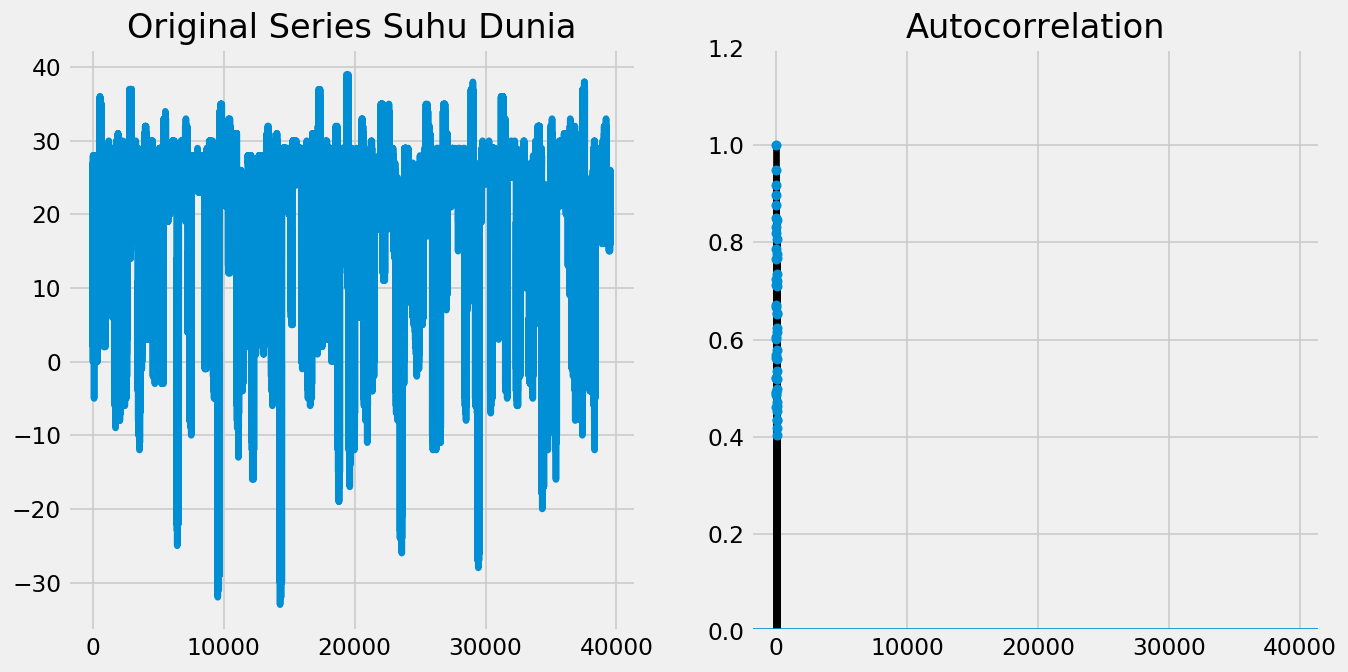

In [367]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(suhu_dunia.avg_temp); 
axes[0].set_title('Original Series Suhu Dunia')
axes[1].set(ylim=(0,1.2))
plot_acf(suhu_dunia.avg_temp.dropna(), ax=axes[1])
plt.show()

In [368]:
model = ARIMA(suhu_dunia.avg_temp, order=(3,0,3))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:               avg_temp   No. Observations:                39545
Model:                     ARMA(3, 3)   Log Likelihood              -86187.057
Method:                       css-mle   S.D. of innovations              2.139
Date:                Tue, 17 Dec 2019   AIC                         172390.114
Time:                        00:02:50   BIC                         172458.796
Sample:                             0   HQIC                        172411.866
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             19.5578      0.765     25.564      0.000      18.058      21.057
ar.L1.avg_temp     2.7087      0.001   2255.862      0.000       2.706       2.711
ar.L2.avg_temp    -2.6851      0.002

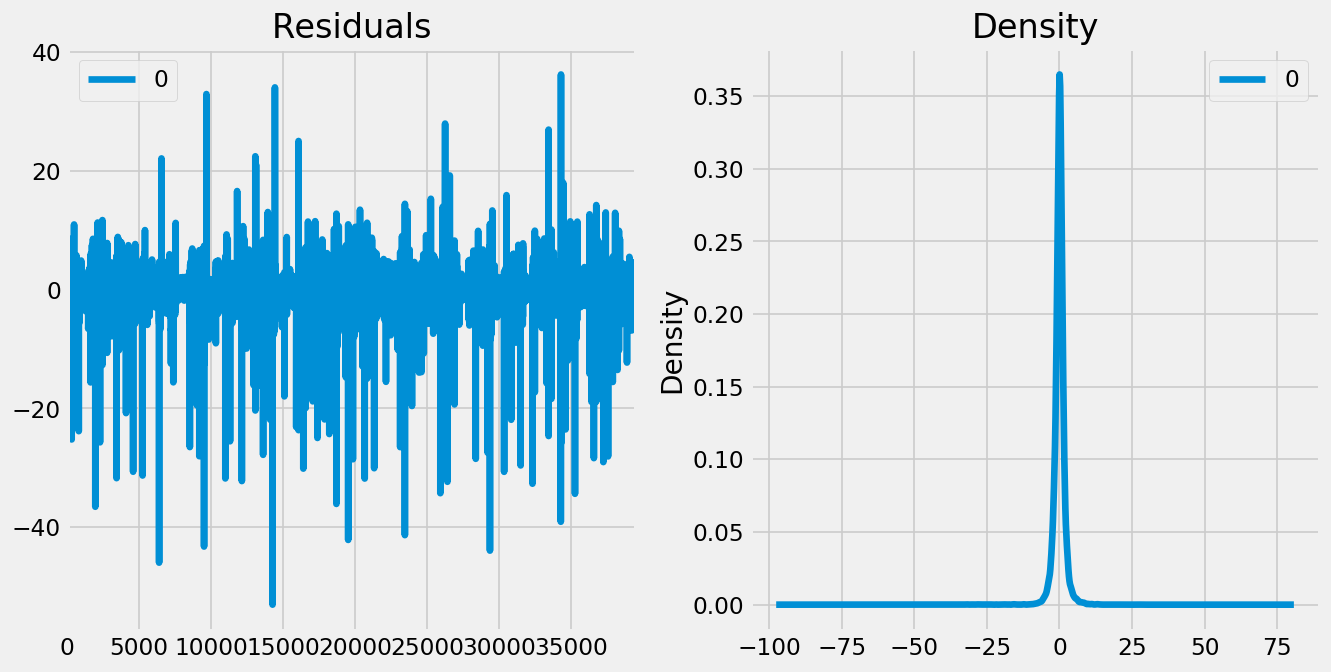

In [369]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

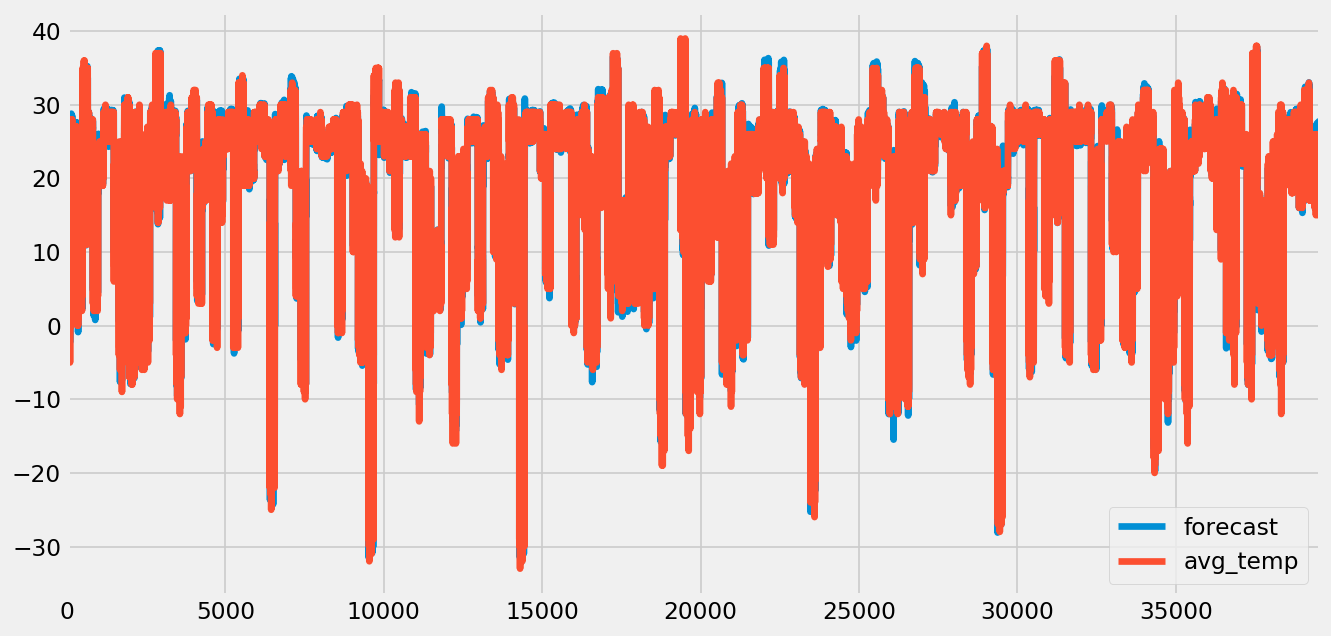

In [370]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [371]:
train = suhu_dunia.avg_temp[:40000]
test = suhu_dunia.avg_temp[40000:]

In [375]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [376]:
model = pm.auto_arima(suhu_dunia.avg_temp, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=197892.549, BIC=197926.890, Fit time=8.859 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=297463.161, BIC=297480.332, Fit time=0.602 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=205742.578, BIC=205768.334, Fit time=1.693 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=254401.595, BIC=254427.351, Fit time=7.237 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=357268.319, BIC=357276.904, Fit time=0.342 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=193168.734, BIC=193211.660, Fit time=11.351 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=193534.306, BIC=193568.646, Fit time=3.159 seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=192523.812, BIC=192575.323, Fit time=27.298 seconds
Fit ARIMA: order=(3, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=192836.784, BIC=192879.710, Fit time=3.017 seconds

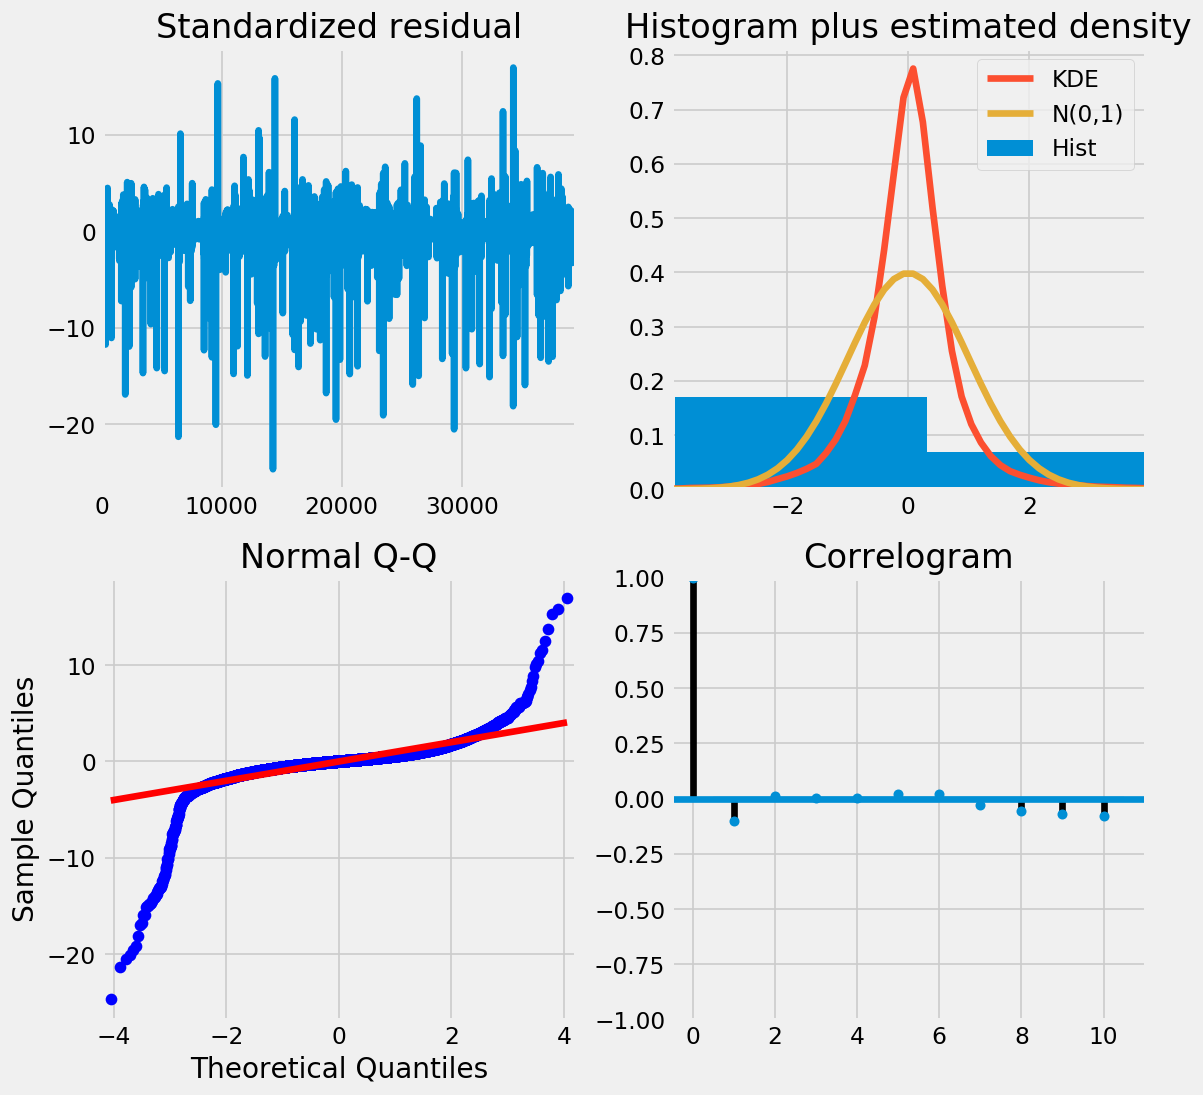

In [379]:
model.plot_diagnostics(figsize=(10,10))
plt.show()

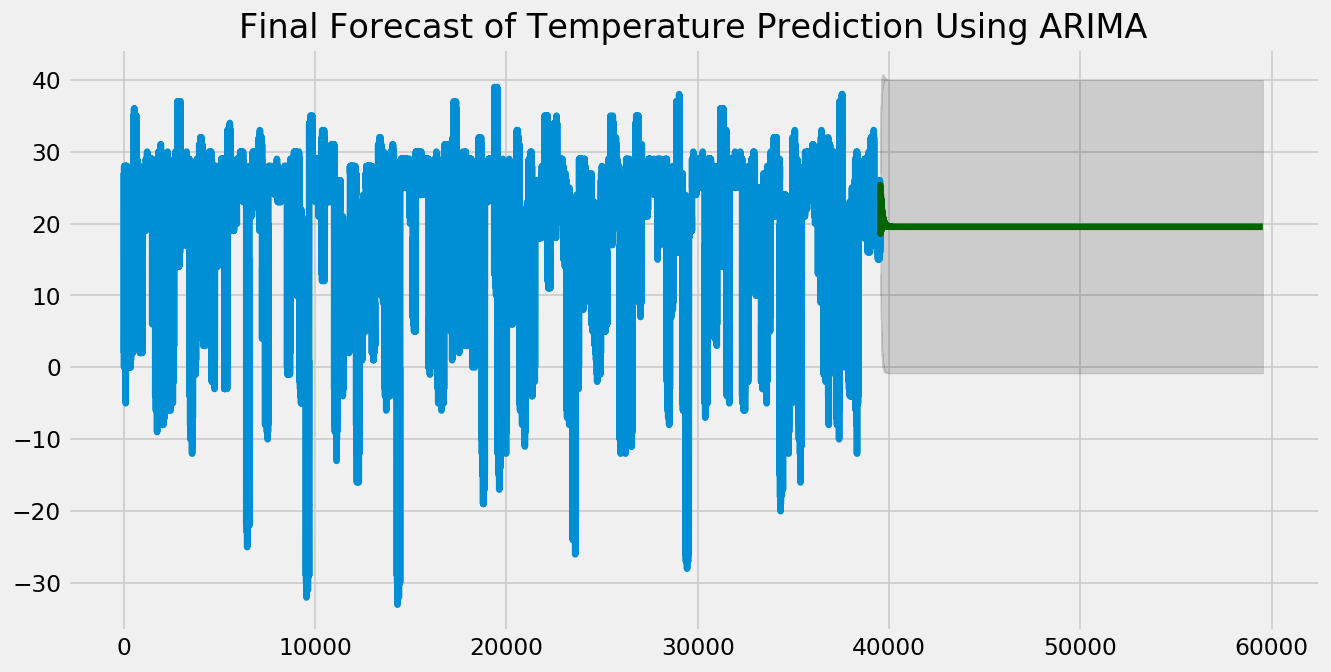

In [414]:
# Forecast
n_periods =  20000 
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(suhu_dunia.avg_temp), len(suhu_dunia.avg_temp)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(suhu_dunia.avg_temp)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Temperature Prediction Using ARIMA")
plt.show()

In [390]:
suhu_indo = pd.read_csv(r'suhu_indo.csv', parse_dates=['date'], index_col='date')

Text(0.5, 0.98, 'Temperature of Indonesia')

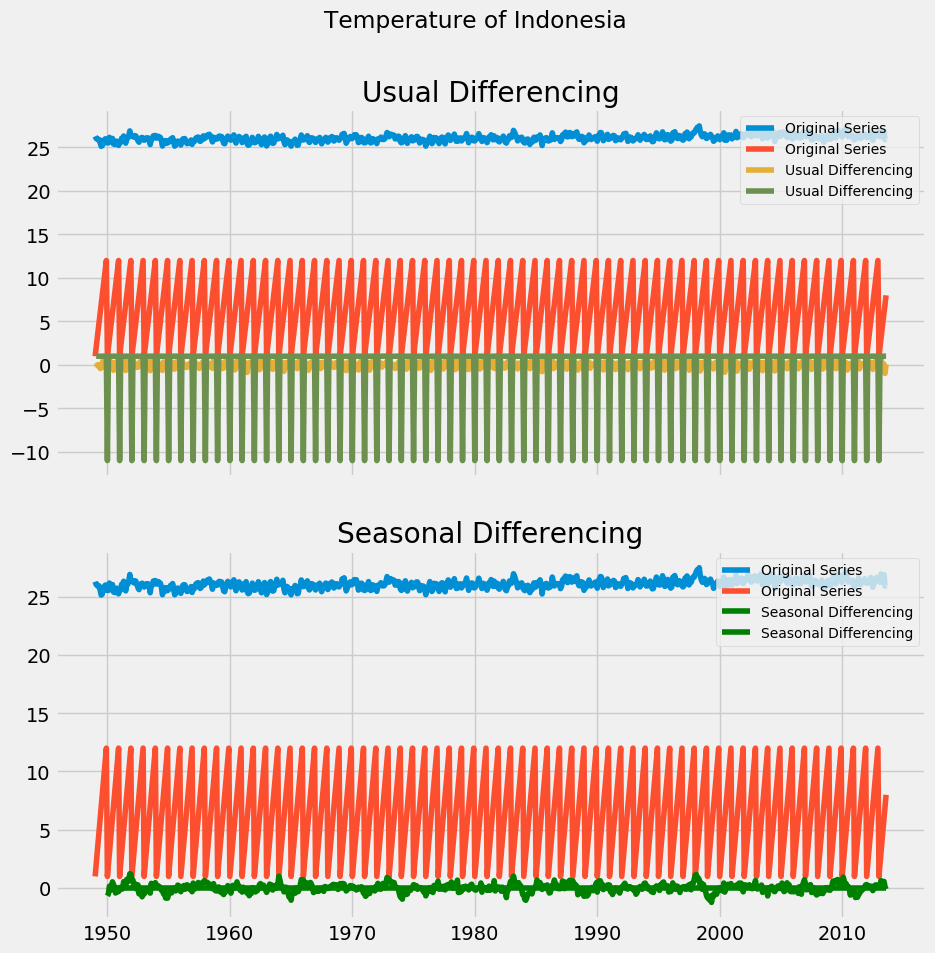

In [415]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,10), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(suhu_indo[:], label='Original Series')
axes[0].plot(suhu_indo[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper right', fontsize=10)


# Seasinal Dei
axes[1].plot(suhu_indo[:], label='Original Series')
axes[1].plot(suhu_indo[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper right', fontsize=10)
plt.suptitle('Temperature of Indonesia')

In [393]:
# Compute Seasonal Index
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# multiplicative seasonal component
result_mul = seasonal_decompose(suhu_indo['avg_temp'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
suhu_indo['month'] = suhu_indo.index.month
df = pd.merge(suhu_indo, seasonal_index, how='left', on='month')
df.columns = ['avg_temp', 'month', 'seasonal_index']
df.index = suhu_indo.index  # reassign the index.

In [394]:
import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(df[['avg_temp']], exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=-387.089, BIC=-359.258, Fit time=8.862 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=574.236, BIC=588.152, Fit time=0.414 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=-52.768, BIC=-29.575, Fit time=3.635 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=-139.100, BIC=-115.908, Fit time=6.914 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=573.049, BIC=582.326, Fit time=0.500 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 0, 12); AIC=88.538, BIC=111.731, Fit time=0.939 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 1, 12); AIC=-385.170, BIC=-352.700, Fit time=10.167 seconds
Near non-invertible roots for order (1, 0, 1)(1, 1, 1, 12); setting score to inf (at least on

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  776
Model:             SARIMAX(2, 0, 0)x(0, 1, 1, 12)   Log Likelihood                 202.055
Date:                            Tue, 17 Dec 2019   AIC                           -392.111
Time:                                    00:45:14   BIC                           -364.280
Sample:                                01-01-1949   HQIC                          -381.396
                                     - 08-01-2013                                         
Covariance Type:                              opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          0.0022      0.000      4.569      0.000       0.001       0.003
seasonal_index  1.178e-07   1.87e-10    629.791      0.000    1.17e-07    1.18e-07
ar.L1              0.5032      0.035     14.479      0.000       0.435       0.571
ar.L2              0.2663      0.037      7.171      0.000       0.194       0.339
ma.S.L12          -0.9849      0.038    -25.785      0.000      -1.060      -0.910
sigma2             0.0327      0.002     16.651      0.000       0.029       0.037
===================================================================================
Ljung-Box (Q):                       53.29   Jarque-Bera (JB):                 5.07
Prob(Q):                              0.08   Prob(JB):                         0.08
Heteroskedasticity (H):               1.04   Skew:                             0.11
Prob(H) (two-sided):                  0.76   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.18e+16. Standard errors may be unstable.
"""

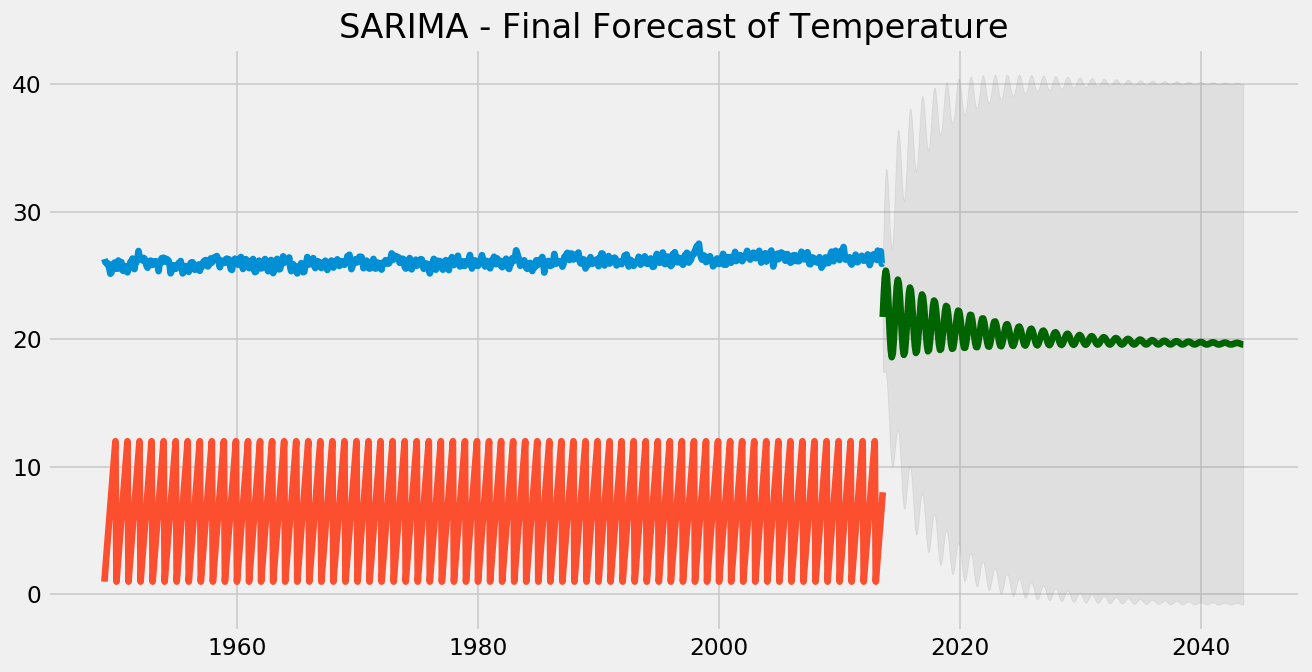

In [408]:

# Forecast
n_periods = 360
fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(suhu_indo.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(suhu_indo)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='grey', alpha=.15)

plt.title("SARIMA - Final Forecast of Temperature")
plt.show()